# ANALYSIS 2 - MAZE AND RECURSION

### part 1 - maze structure, encoding, decoding, plotting and debugging

In this exercise we will explore how to define a maze and how to plot it with pyplot. This document contains:
- [Maze definition](#def)
- [Data structure](#data)
- [Binary masks for encoding and decoding](#mask)
- [Maze plotting](#plot)
- [Extra utility functions](#extra)
- [Final exercise](#final)


<a id='def'></a>
## Maze or Labyrinth

A __maze__ is a puzzle with a starting point and many different paths to choose to in order to find the exit. A __labyrinth__ typically has one way in and one way out.

In Greek mythology, the __Labyrinth__ was an elaborate, confusing structure designed and built by the legendary artificer Daedalus for King Minos of Crete, intended to hold the Minotaur (more info: [Wikipedia: Labyrinth](https://en.wikipedia.org/wiki/Labyrinth)). Romans built labyrinths in places they settled. Known also as __roman labyrinth__, they are typically square shaped.

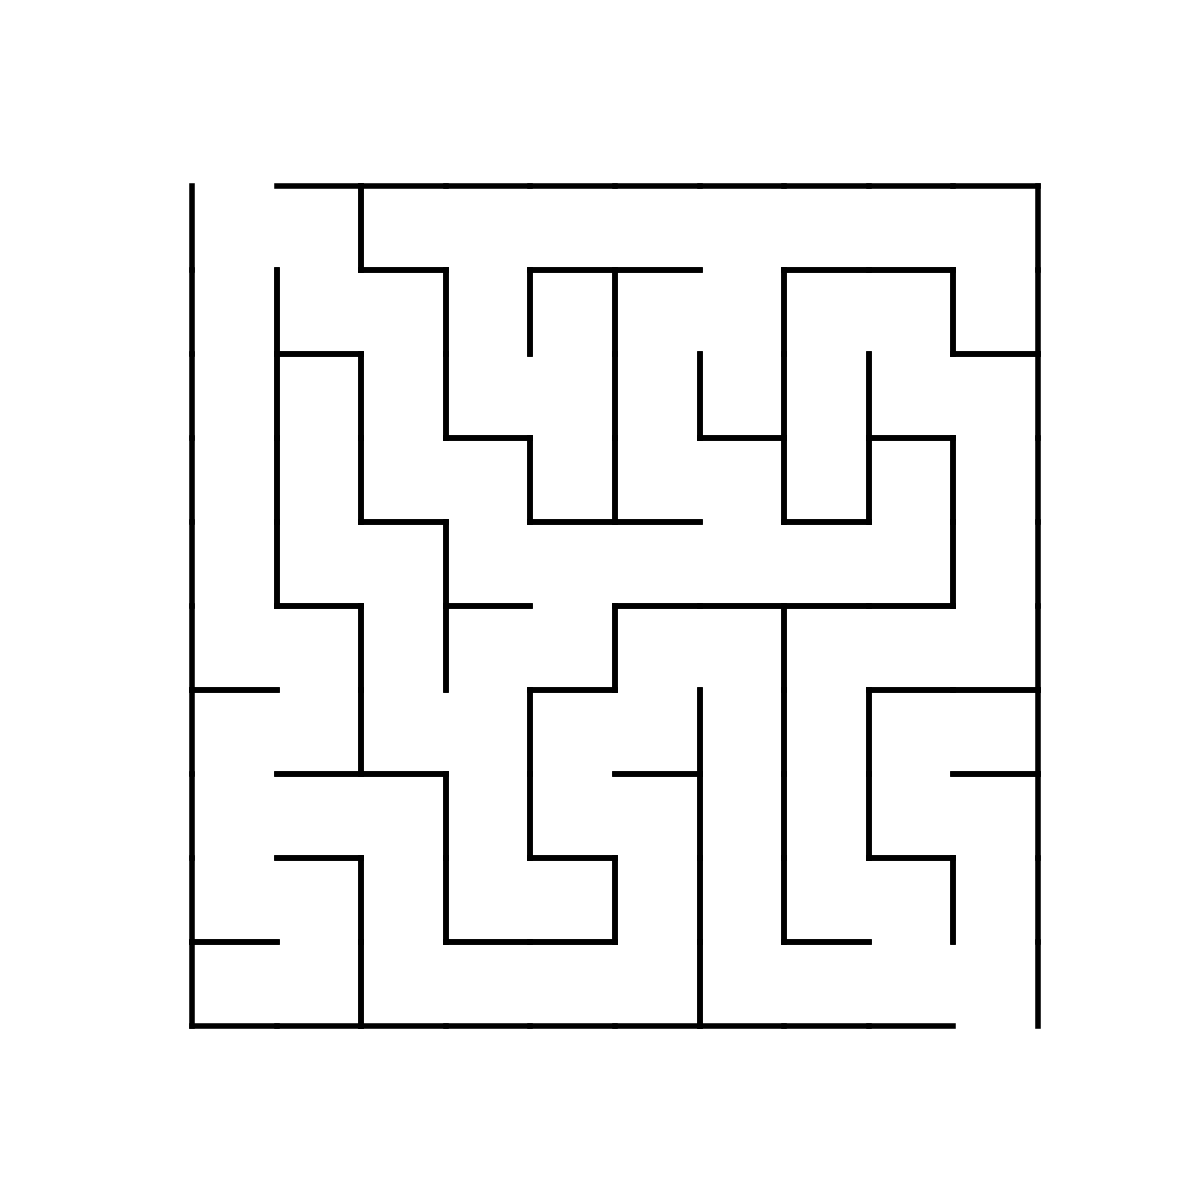</img>

In this exercise, we will use a rectangular labyrinth (maze - i.e. sometimes we will have more than one possible path) consisting of cells. The entrance (start point) will be the cell on the top left, and the exit (end point) will be the cell on the bottom right. The movement from one cell to another is possible in four directions: UP, DOWN, LEFT, RIGHT, if two cells are connected - i.e. there is no wall between them.

<a id='data'></a>
## Data structure

We will start by deciding the appropriate data structure to represent our maze. Since we have cells and can move in only four directions, representing our maze as a table is the obvious choice. Rows and columns of such table will be height and width of our maze respectively.

Each cell has its own (x,y) coordinates, starting from top-left as (0,0). y-coordinate represents the row of a cell, while x-coordinate represents the column of a cell. In the simplest form, the value of a cell can be `bool` or `int`, with `True` (1) depicting that the cell is 'walkable', and `False` (0) depicting a wall.

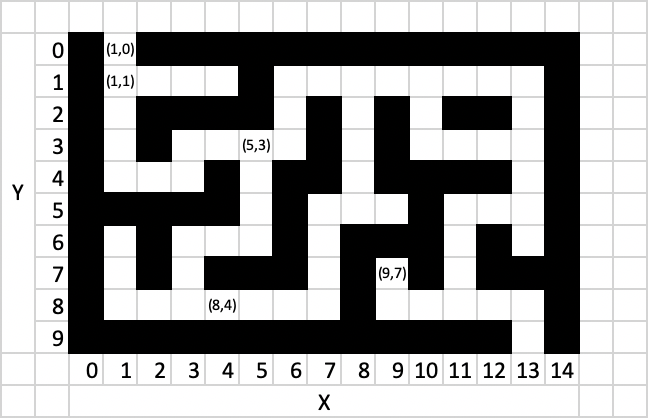</img>


In Python, the most obvious choice would be to use matrices, which are part of NumPy. But, if we don't want to import numpy, we can represent the same structure as nested lists. More specific, each row can be a list of integers, while entire maze can be a list of those rows.

We can hard-encode the above maze in Python like this:

In [ ]:
# each row can be represented as list of integers
# 0 - wall, 1 - walkable
row0 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
row1 = [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
row2 = [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
row3 = [0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
row4 = [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
row5 = [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0]
row6 = [0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
row7 = [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
row8 = [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
row9 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

# and the entire maze as list of rows
maze = []
maze.append(row0)
maze.append(row1)
maze.append(row2)
maze.append(row3)
maze.append(row4)
maze.append(row5)
maze.append(row6)
maze.append(row7)
maze.append(row8)
maze.append(row9)


Let's test it by printing out our maze in console. Although, 'console art' has limitations, the output should be similar to the figure above.

In [ ]:
for row in maze:
    for cell in row:
        # check if cell is a wall
        if cell == 0:
            # since we want to print in a row, set end=""
            print("▒▒", end="") # we can print any unicode character
        else:
            print("  ", end="")
    print()

<a id='mask'></a>
## Binary masks - encoding and decoding cell value

The simplest structure used above has every cell containing only two values: `cell = 1` - walkable, `cell = 0` - wall. The disadvantage of such approach is that we "waste" entire cell to represent a wall. If we want each cell to be walkable, and represent walls between cells, then a different data structure has to be used.

Since every cell can be surrounded by four walls, we can use four `bool` values or four `int` to represent each of them. Therefore, each cell could be a tuple, with each value showing if that direction is walkable or not. Here, we will enumerate all directions in a clockwise manner, listing them from right to left.

`cell = (left, down, right, up)`

Here is an example for a simple 3x2 maze:

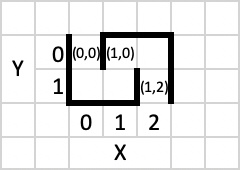

And this is the way we can encode walkable paths for three cells: (0,0), (1,0), (1,2).

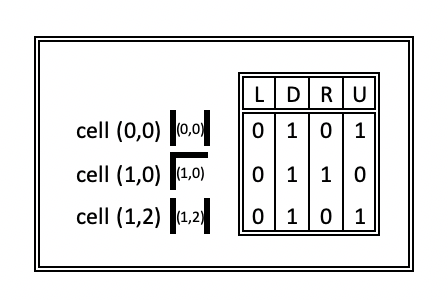</img>

Note that each direction can be either 0 or 1, which is, essentially, a binary language. Instead of using four values to store each direction, we can do the same with bits. Remember: 1 byte = 8 bits. As we need only 4 bits, that implies  we can use a single `int` to hold all four `True`/`False` values.

Therefore:
- 0000 - surrounded by walls on all four sides
- 0001 - can move UP, other directions have walls
- 0010 - can move RIGHT, other directions have walls
- 0100 - can move DOWN, other directions have walls
- 1000 - can move LEFT, other directions have walls
- ...
- 0110 - can move RIGHT and DOWN, other two directions have walls
- ...
- 1011 - can move LEFT, RIGHT and UP, only down is not accessible
- ...
- 1111 - can move in all four directions, no walls

To tell Python we want to use binary value use prefix `0b`.
Let us experiment converting some of those binary values to integers. Just run the cell bellow. Feel free to change the value.

In [ ]:
cell = 0b0110
print(cell)

To represent all possibilities for each cell we need 16 values (`2**4`), but writing 16 if statements would be a poor programming practice. Instead, we will create binary masks, and use binary AND (`&`) and binary OR (`|`) to encode and decode cell values.

A bitwise OR (`|`) is used to turn desired bits ON. Because bitwise OR will leave bits unchanged where the mask had bit value 0, and turn on only those positions were bits were 1. (Remember: x OR 0 = x; x OR 1 = 1)
A bitwise AND (`&`) will turn all bits OFF where the mask has 0 and keep bits unchanged where mask has bits with the value 1. (Remember: x AND 0 = 0; x AND 1 = x)

For more info on masks in computing, you can start with [Wikipedia: mask(computing)](https://en.wikipedia.org/wiki/Mask_(computing)).


Let's start defining constants.

In [ ]:
UP    = 0b1000
RIGHT = 0b0100
DOWN  = 0b0010
LEFT  = 0b0001

Next, let's practice encoding few cells.

In [ ]:
cell_00 = DOWN
cell_10 = UP | RIGHT
cell_11 = LEFT | DOWN | RIGHT
# add more cells and practice


Print them out to see what values they hold. What do you notice?

In [ ]:
# just run the cell (shift+enter)
# try printing out other cells you created
cell_11

To check if we can walk from given cell in desired direction, use binary AND (`&`) with the cell's value. Binary AND will turn OFF all bits except those with the same position as 1s in the mask. If the result is 0, then the desired direction doesn't exist in the cell's value. Otherwise, the desired direction is walkable (1).

In [ ]:
# run this cell; try changing the direction and observe results
cell_00 & DOWN

Do the same for cell_10. Use binary AND to determine if there are paths in four possible directions.

In [ ]:
print(cell_10 & RIGHT)
print(cell_10 & DOWN)

To test if you understand how we encode / decode cell values and the use of masks, implement a function `cell_connected(field, direction)`. It should take two arguments: `field` and `direction`, where the first is an `int` containing the encoded cell value (like in the examples above), while the second is one of the mask constants (UP, DOWN, LEFT, RIGHT). The function should return `True` if it is possible to walk in `direction`, or `False` if that direction contains wall.

In [ ]:
# IMPLEMENT

def cell_connected(field, direction):
    """ Tests if the current cell value (integer) is connected with desired direction """
    # IMPLEMENT THIS FUNCTION
    
    
    

A good programming practice suggest that once each function is written, it gets subjected to tests. Once it passes, it can be integrated into the rest of the code. Run the cell below to test your function `cell_connected(field, direction)`. If it fails, go back and fix it until is passes.

In [ ]:
# test cases
test_cell_1 = LEFT | UP | DOWN
test_cell_2 = RIGHT

# hard encoded tests; we will do something smarter later
correct = True

if not(cell_connected(test_cell_1, LEFT)): correct = False
if not(cell_connected(test_cell_1, UP)): correct = False
if not(cell_connected(test_cell_1, DOWN)): correct = False
if cell_connected(test_cell_1, RIGHT): correct = False
    
if cell_connected(test_cell_2, LEFT): correct = False
if cell_connected(test_cell_2, UP): correct = False
if cell_connected(test_cell_2, DOWN): correct = False
if not(cell_connected(test_cell_2, RIGHT)): correct = False

    
if correct:
    print("Function 'cell_connected' passed tests.")
else:
    print("Function 'cell_connected' failed one or more tests.")

<a id='plot'></a>
## Maze plotting
With the data structure defined and with the means to decode cell values, we can focus on the next segment - how to plot our maze. For better image quality, we will use pyplot instead of printing in console. Pyplot requires more work, thou. 

To experiment, we created few 6x3 and 12x6 mazes for you. Execute the cell below to load the structure into memory.

In [ ]:
## 6x3 mazes
m01 = [[10, 6, 5, 5, 5, 3], [10, 12, 7, 1, 6, 11], [12, 5, 9, 4, 9, 10]]
m02 = [[14, 3, 6, 7, 3, 2], [10, 10, 10, 10, 12, 11], [8, 12, 9, 8, 4, 11]]
m03 = [[10, 6, 5, 5, 5, 3], [14, 9, 2, 6, 3, 10], [12, 5, 9, 8, 12, 11]]
m04 = [[14, 5, 5, 3, 6, 3], [10, 4, 3, 12, 9, 10], [12, 5, 9, 4, 5, 11]]

## 12x6 mazes
m11 = [[10, 6, 5, 5, 7, 5, 3, 6, 7, 3, 6, 3], [10, 10, 6, 5, 9, 6, 9, 8, 10, 10, 8, 10], 
       [10, 10, 12, 5, 3, 12, 7, 5, 9, 12, 3, 10], [10, 12, 3, 2, 12, 3, 10, 4, 3, 2, 10, 10], 
       [14, 3, 12, 11, 2, 10, 12, 1, 10, 10, 12, 11], [8, 12, 5, 13, 9, 12, 5, 5, 9, 12, 5, 11]]
m12 = [[10, 6, 7, 1, 6, 5, 5, 5, 5, 3, 4, 3], [14, 9, 12, 3, 12, 3, 2, 6, 5, 9, 6, 9], 
       [12, 5, 3, 12, 3, 12, 11, 10, 6, 1, 14, 3], [2, 6, 9, 6, 13, 1, 10, 8, 12, 5, 9, 10], 
       [10, 10, 6, 9, 6, 3, 10, 4, 7, 5, 3, 10], [12, 9, 12, 5, 9, 12, 13, 5, 9, 4, 13, 11]]
m13 = [[12, 5, 7, 5, 7, 3, 4, 7, 5, 5, 5, 3], [6, 3, 12, 1, 10, 12, 3, 10, 6, 5, 1, 10], 
       [10, 12, 3, 6, 9, 6, 13, 9, 14, 5, 3, 10], [14, 3, 12, 9, 4, 13, 5, 5, 13, 3, 10, 10], 
       [10, 12, 5, 5, 5, 5, 3, 12, 3, 8, 12, 9], [12, 5, 5, 5, 5, 1, 12, 5, 13, 5, 5, 3]]
m14 = [[14, 5, 3, 4, 5, 3, 6, 5, 3, 6, 7, 3], [12, 3, 12, 5, 3, 10, 10, 6, 9, 8, 10, 10], 
       [6, 9, 2, 6, 9, 14, 11, 10, 6, 5, 9, 10], [12, 3, 10, 10, 6, 11, 10, 8, 10, 6, 5, 9], 
       [6, 9, 12, 13, 9, 8, 12, 5, 9, 12, 5, 3], [12, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 11]]

Before going into the problem heads-on, it is wise to subdivide the problem and create some helper functions. You will need in iterations height and width of a maze, so let's start with those. Implement `get_height(maze)` and `get_width(maze)`, which will for our agreed maze structure (list of lists of integers), return maze height and maze width respectively.

In [ ]:
# IMPLEMENT

def get_height(maze):
    """ Returns height of a given maze """
    # WRITE YOUR CODE HERE
    # ...

    
    
def get_width(maze):
    """ Returns width of a given maze """
    # WRITE YOUR CODE HERE
    # ...
    
    
    

Test them on `m01`. They should return 3 for height and 6 for width.

In [ ]:
# Use this cell to test your functions
print(get_height(m01)) # this should return 3
print(get_width(m01)) # this should return 6

Next, we need to setup our plot. This function requires a bit more knowledge of pyplot, so we implemented it for you. Just run the cell. 

In [ ]:
SHOW_AXES = False               # toggle AXES ON / OFF - for debug

def setup_plot(maze, figsize = None):
    """ This function must be called before all other plotting functions.
        It prepares pyplot to draw given maze (sets size and axes).
        Change constant SHOW_AXES to turn ON / OFF X,Y axes. """
    height = get_height(maze)
    width = get_width(maze)

    # set figure size; as top left cell is (0,0), y-axis must be inverted
    plt.figure(figsize=figsize or (width/5, height/5))
    ax = plt.gca()
    ax.invert_yaxis()

    # for debug purposes, display axes; also adjust ticks by 0.5
    if SHOW_AXES:
        x_ticks = [i+0.5 for i in range(width)]
        x_labels = [str(i) for i in range(width)]
        y_ticks = [i+0.5 for i in range(height)]
        y_labels = [str(i) for i in range(height)]

        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_labels)
        plt.xlabel("X")
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)
        plt.ylabel("Y", rotation=0)
    else:
        plt.axis('off')

Now we need a function to plot a cell at its (x,y) position, and show walls around it. We will define it as `plot_cell(X, Y, field)`. It should take `x` value as cell's row, `y` value as cell's column, and `field` as the encoded value showing which directions are accessible.

There are several ways to do it, depending what you define as coordinates for the cell's center. In our case, we chose left,top corner to be (x,y), bottom right corner to be (x+1, y+1), and cell's center to be (x+0.5, y+0.5).

To draw walls, we use pyplot's functionality to draw lines. Each cell can be surrounded by maximum four walls. We implemented the first two cases. Please finish the implementation.

In [ ]:
# FINISH THE CODE
def plot_cell(X, Y, field):
    """ Plot walls for a given cell based on its field (int) value """
    if not cell_connected(field, UP):
        plt.plot([X,X+1], [Y,Y],"k-", linewidth=2)
    if not cell_connected(field, DOWN):
        plt.plot([X,X+1], [Y+1,Y+1],"k-", linewidth=2)
    # IMPLEMENT THE REMAINING TWO CASES
    # ...
    # ...
    
    
    

Finally, we need a function to plot entire maze. We will define it as `plot_maze(matrix)`. It should iterate through all rows (hence Y first), then through all columns (X second), and then for each cell call `plot_cell()`.

Note: since we start from Y and then X, you will want to pass `matrix[y][x]` as field value in `plot_cell()`.

In [ ]:
# FINISH THE CODE

def plot_maze(matrix):
    """ Call this function to plot maze.
    IMPORTANT: this function should be called after setup_plot()"""
    # iterate for every y in matrix height
    # ...
    # iterate for every x in matrix width
    # ...
    # call plot_cell to plot at (x,y) cell value matrix[y][x]
    # ...
    
    
    

Time to put this all together. If all functions have been implemented correctly, for maze = m01, you should get the image like the one below. 

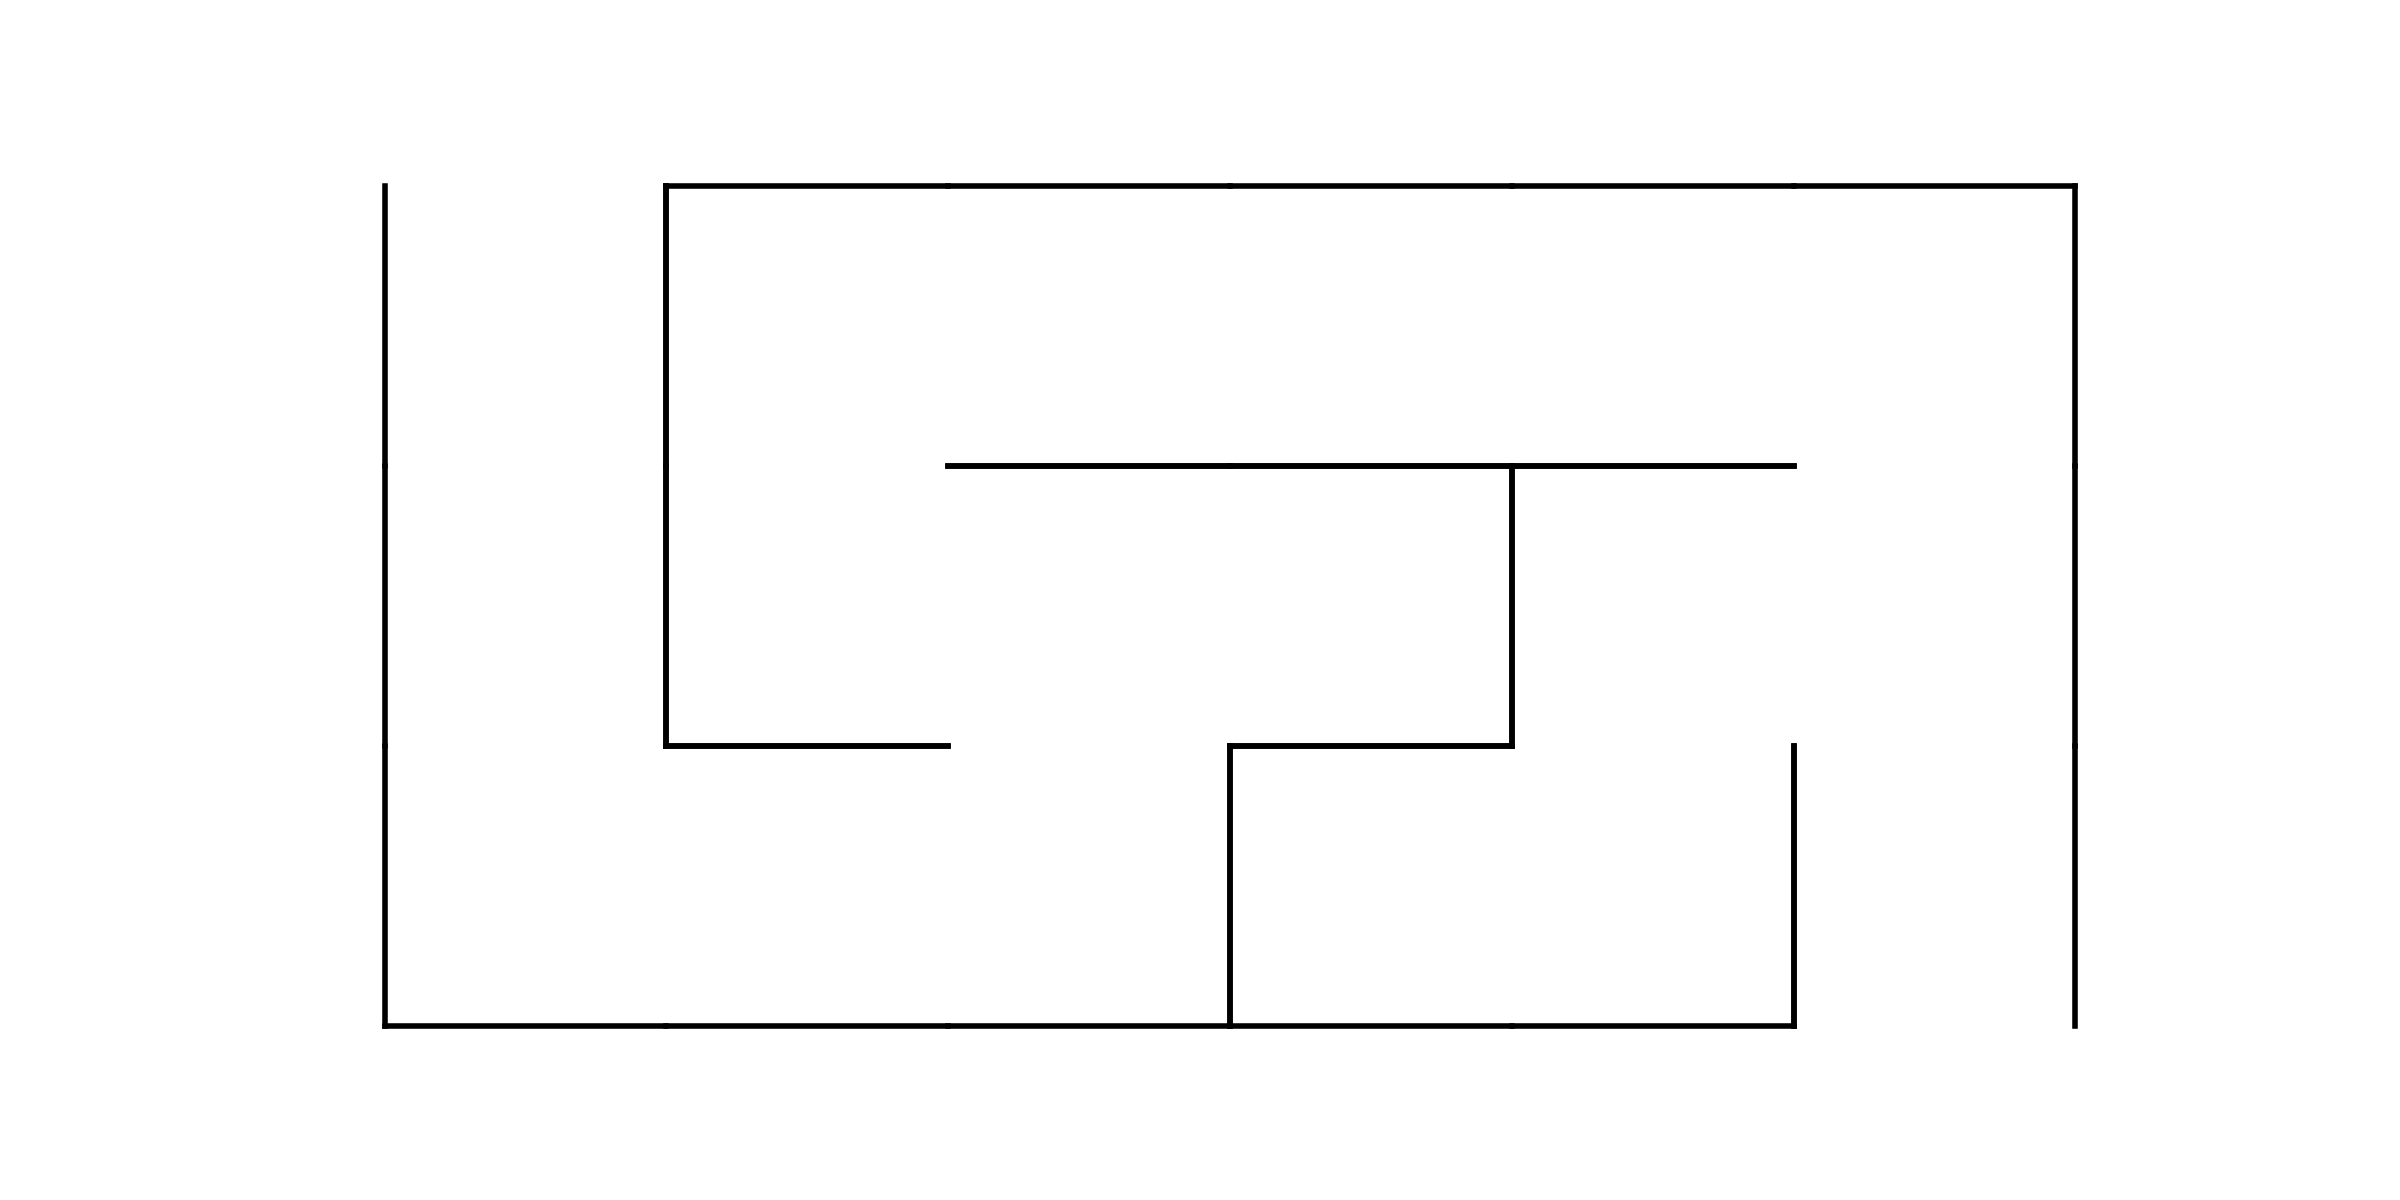</img>

In [ ]:
# import pyplot first
import matplotlib.pyplot as plt

# constant to alter the behavior
SHOW_AXES = False               # toggle AXES ON / OFF - for debug

# load maze; feel free to change m01 to any other maze provided
maze = m01

# setup plot and plot maze
# alter figsize to change the size of plot area
setup_plot(maze, figsize = (12,6))
plot_maze(maze)

# display plot
plt.ion()
plt.show()

Congratulations! You plotted your first maze! Test the robustness of your code by plotting other provided mazes.

<a id='extra'></a>
## Extra utility functions

Adding additional utility / helper functions enables you to debug and maintain your program much easier. Assume that you want to edit cells of your maze, such that you create new configuration. That is much easier if you visually identify the coordinates of desired cell. To that end, include two more functions.
- `write_in_cell(X, Y, text)` - to write a string at the cell's center
- `plot_coords(matrix)` - to write for entire maze (x,y) coordinates of each cell

To write at specific point in pyplot, check documentation.
- [matplotlib](https://matplotlib.org/index.html)
- [pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)

As this is not part of the course, we will implement the first function for you. Also, let's add another constant to easily modify the font size later if needed.

In [ ]:
FONT_SIZE = 8

def write_in_cell(X, Y, text):
    """ Writes given text (str) at given (X,Y) coordinates """
    plt.text(X+0.5,Y+0.5,text, horizontalalignment='center', size=FONT_SIZE)

Test it by using maze m11 and marking start and end. Change `SHOW_AXES = True` to help identify what goes wrong if the output is not in the desired location. You will know you have done everything correctly, if you get the output like the one below.

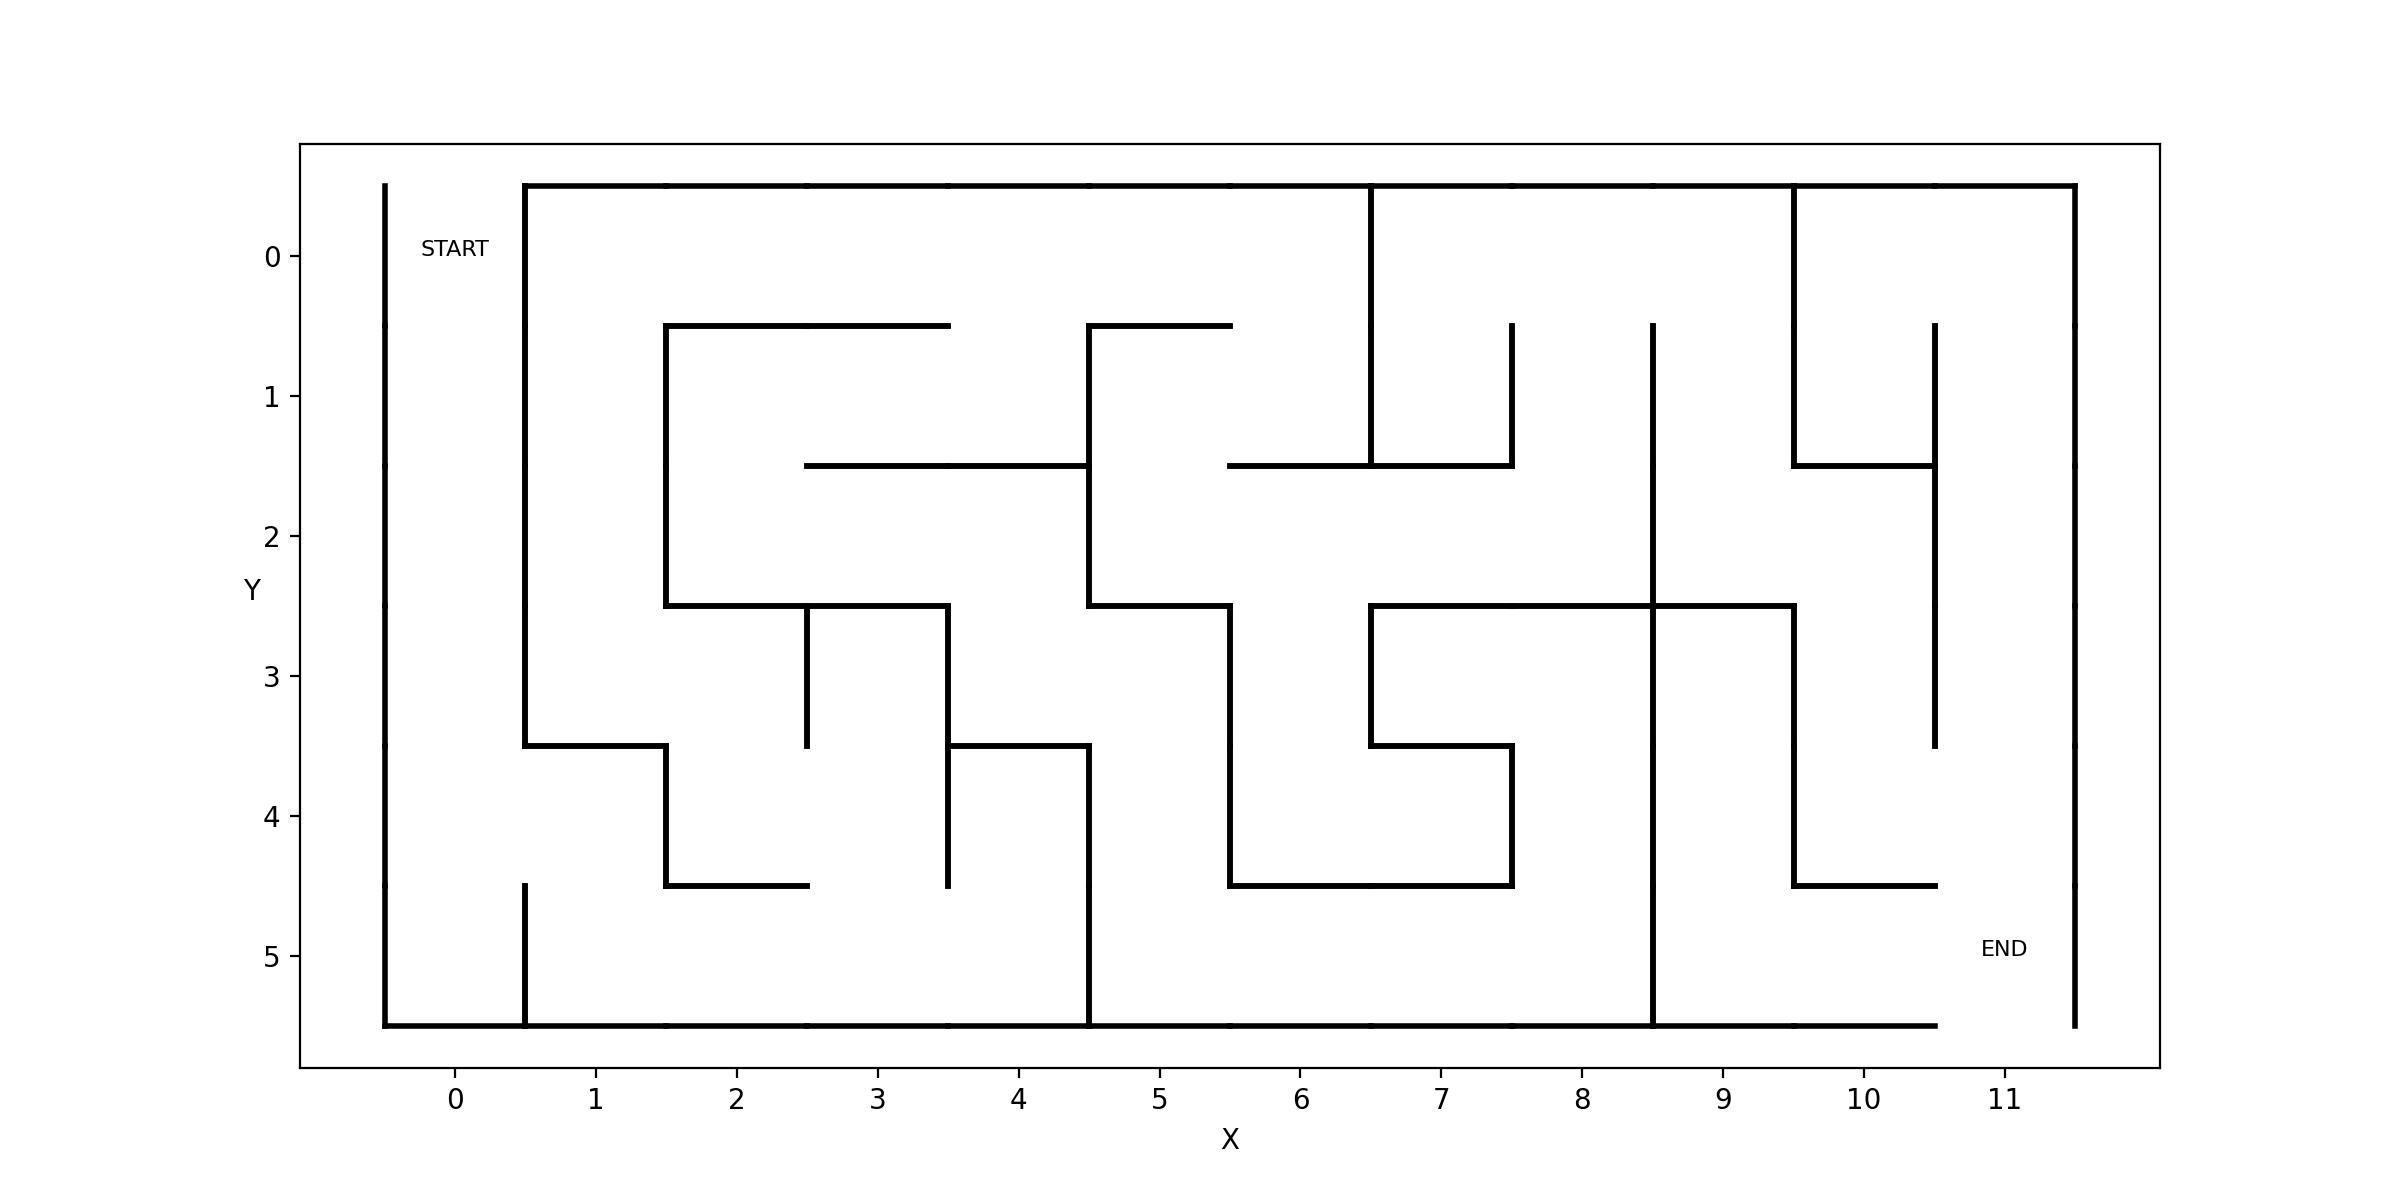</img>

In [ ]:
# ADD THE MISSING PART OF THE CODE

# import pyplot first
import matplotlib.pyplot as plt

# constant to alter the behavior
SHOW_AXES = True               # toggle AXES ON / OFF - for debug
FONT_SIZE = 8

# load maze
maze = m11

# setup plot and plot maze
setup_plot(maze, figsize = (12,6))
plot_maze(maze)

# IMPLEMENT THIS
# add your code and call write_in_cell() to mark start and end 
# ...
# ...

# display plot
plt.ion()
plt.show()

Add another control constant `SHOW_CELL_COORDS`.

In [ ]:
SHOW_CELL_COORDS = True

Implement `plot_coords(matrix)`.

In [ ]:
# IMPLEMENT

def plot_coords(matrix):
    """ Call this function to write inside of each cell its (X,Y) coordinates """
    # implement this function
    # ...
    # ...

Load `maze = m12` and plot it. Use `plot_coords` to display coordinates of each cell. This time don't write START and END, because they are written at the same place, and the output won't be pretty. Below is the target result.

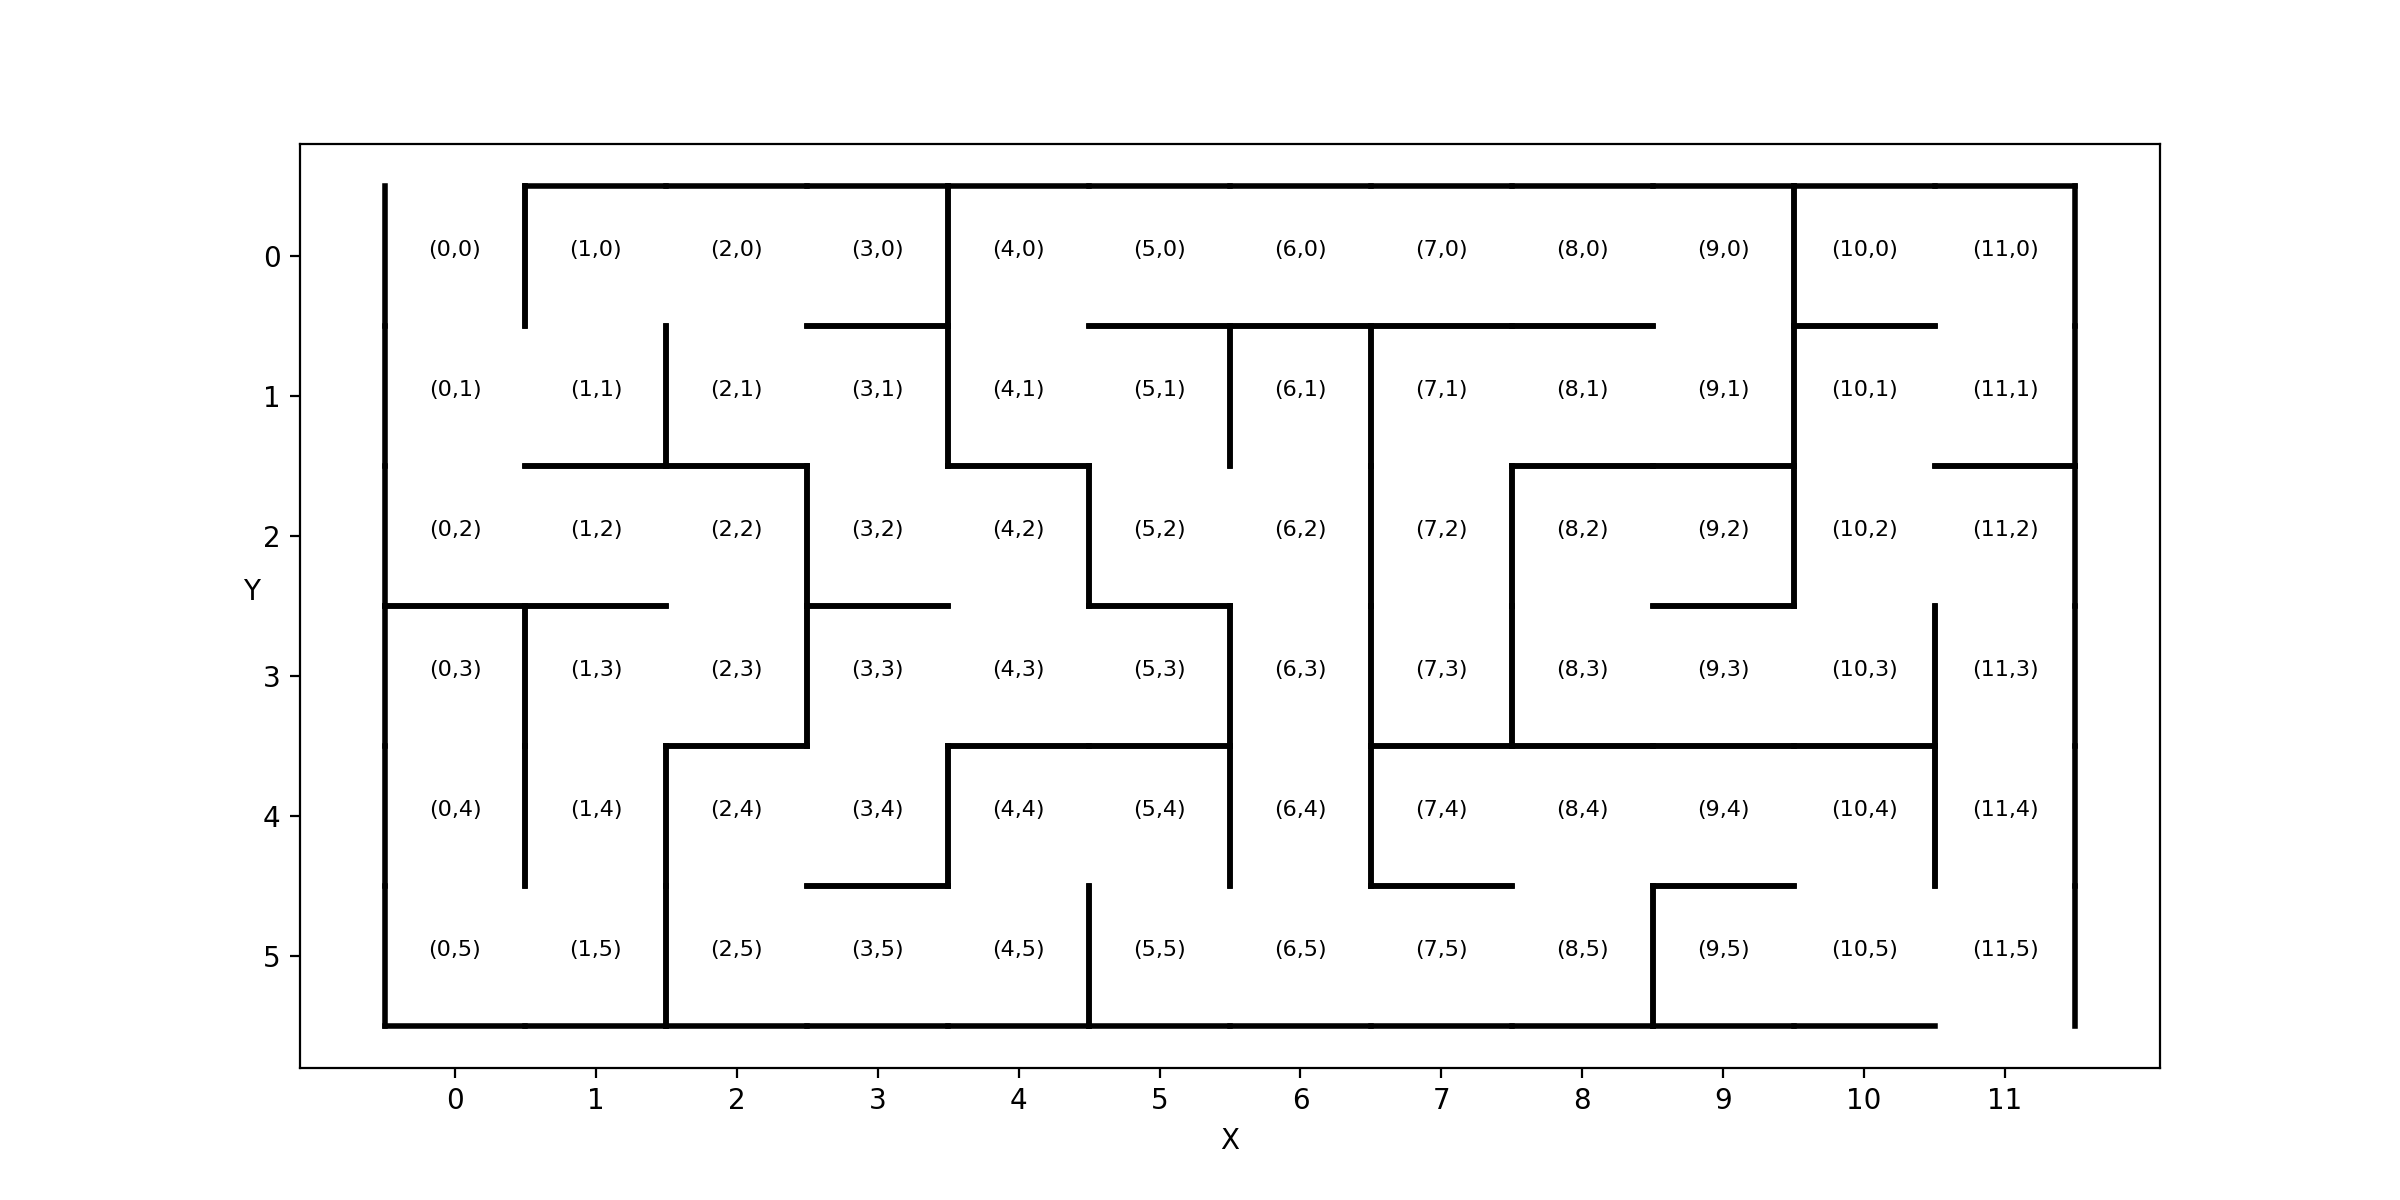</img>

<a id='final'></a>
## Final exercise - putting everything together

In [ ]:
# Implement the complete program
# Hint: you can reuse most of the code we have done already

# We have completed import section and constants
# Note: you still have to run cell with mazes, or copy those here

In [ ]:
## Import section
import matplotlib.pyplot as plt

In [ ]:
## Display constants
FONT_SIZE = 8

SHOW_AXES = True               # toggle AXES ON / OFF - for debug
SHOW_CELL_COORDS = True        # write (x,y) coords in cells - for debug

## Encoding constants
UP      = 0b1000
RIGHT   = 0b0100
DOWN    = 0b0010
LEFT    = 0b0001

In [ ]:
# IMPLEMENT

## Utility and plotting functions











In [ ]:
# IMPLEMENT 

## MAIN PROGRAM











Well done! The structure, encoding and plotting of maze is finished. In the next exercise we will use this code and explore how to solve a maze using recursion.